In [1]:
%matplotlib inline

import yfinance as yf
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import datetime as dt
from dateutil.relativedelta import relativedelta

In [5]:
today = dt.datetime.today()
yesterday = today - dt.timedelta(days=1)
end_date = dt.datetime.date(today)
# start_date = end_date - relativedelta(years=19, months=7)
start_date = dt.date(2005, 1, 3)

In [6]:
# initializing parameters
# exchange_rates = ['USDTRY=X', 'EURTRY=X', 'GBPTRY=X', 'GC=F']
stock_indices = ['^MXX', '^JKSE', '^GSPTSE', '^FCHI', '^GDAXI', 'FTSEMIB.MI', '^N225', '^FTSE', '^GSPC', 'XU100.IS']
# data_rates = yf.download(exchange_rates, start=start_date, end=end_date)
data_indices = yf.download(stock_indices, start=start_date, end=end_date)

[*********************100%%**********************]  10 of 10 completed


In [7]:
idx = pd.date_range(
    data_indices.index[0].date(),
    data_indices.index[-1].date()
)
idx

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-08', '2005-01-09', '2005-01-10',
               '2005-01-11', '2005-01-12',
               ...
               '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07',
               '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11',
               '2024-08-12', '2024-08-13'],
              dtype='datetime64[ns]', length=7163, freq='D')

In [10]:
# data_rates.index = pd.DatetimeIndex(data_rates.index)
# data_rates = data_rates.reindex(idx, fill_value=np.nan).ffill()
data_indices.index = pd.DatetimeIndex(data_indices.index)
data_indices = data_indices.reindex(idx, fill_value=np.nan).ffill()
data_indices = data_indices.reindex(idx, fill_value=np.nan).bfill()

In [11]:
df = data_indices['Open']
for d in df['XU100.IS'].keys():
    if d.date() < dt.date(2020,7,27):
        df.at[d, 'XU100.IS'] = df.at[d, 'XU100.IS'] / 100

<AxesSubplot: >

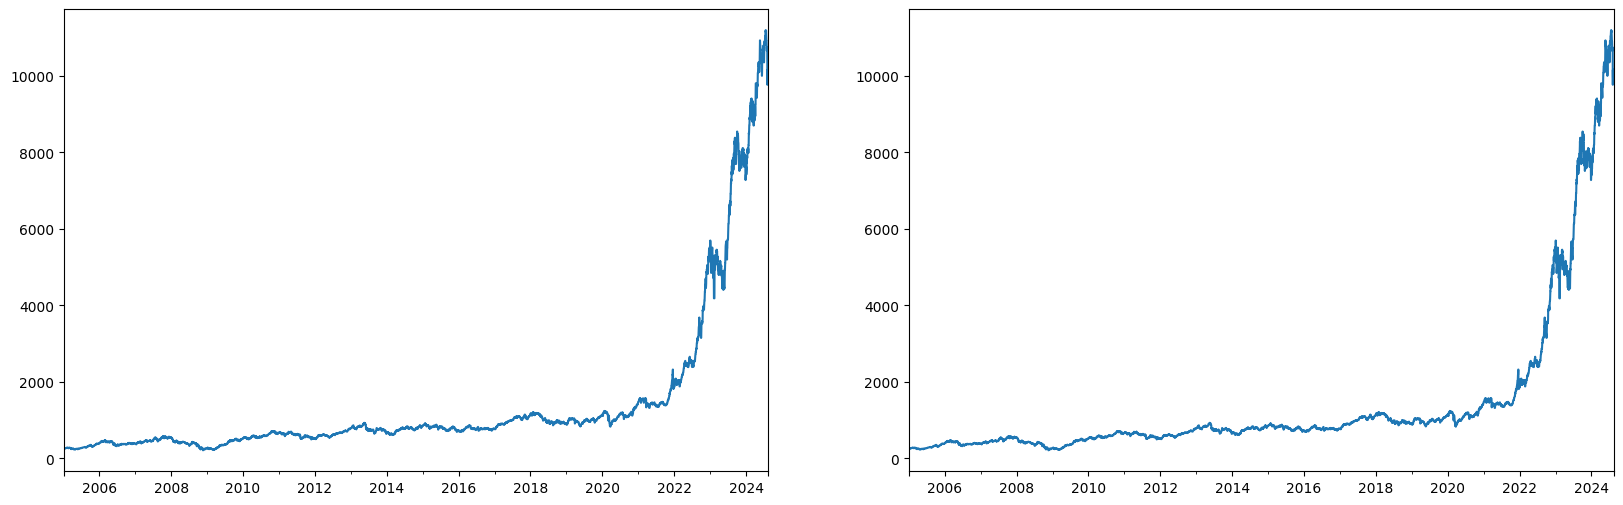

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
data_indices['Open']['XU100.IS'].plot(ax=ax[0])
df['XU100.IS'].plot(ax=ax[1])

In [8]:
df['^N225'].isnull().sum()

0

In [9]:
# data = pd.concat([data_rates['Adj Close'], df], axis=1)
df

Ticker,FTSEMIB.MI,XU100.IS,^FCHI,^FTSE,^GDAXI,^GSPC,^GSPTSE,^JKSE,^MXX,^N225
2005-01-03,31005.0,254.451992,3855.679932,4847.000000,4291.529785,1202.079956,9143.000000,1000.838074,13022.820312,11517.750000
2005-01-04,31094.0,250.420000,3863.300049,4847.000000,4290.500000,1188.050049,9143.000000,1018.503357,12777.129883,11517.750000
2005-01-05,30976.0,244.229004,3829.360107,4806.000000,4258.240234,1183.739990,9021.099609,1015.391479,12591.330078,11437.519531
2005-01-06,31073.0,245.619004,3856.479980,4824.299805,4300.939941,1187.890015,9064.299805,1029.845825,12703.469727,11492.259766
2005-01-07,31128.0,253.083008,3877.959961,4854.100098,4316.399902,1186.189941,9006.200195,1032.484863,12453.330078,11433.240234
...,...,...,...,...,...,...,...,...,...,...
2024-08-05,31294.0,9893.400391,7148.990234,8008.200195,17339.000000,5186.330078,22227.599609,7059.652832,51776.480469,31458.419922
2024-08-06,31107.0,9881.200195,7130.040039,8026.700195,17354.320312,5240.029785,21979.400391,7129.214844,52399.628906,34675.460938
2024-08-07,31832.0,10024.299805,7266.009766,8166.899902,17615.150391,5199.500000,21881.000000,7212.130859,52680.898438,35089.621094
2024-08-08,31742.0,10098.500000,7247.450195,8145.000000,17680.400391,5319.310059,22225.599609,7195.121094,52876.550781,34831.148438


In [10]:
pd.DataFrame.to_csv(df.round(6), 'indices.csv', index=False, header=False)
# pd.DataFrame.to_csv(data.round(6), 'alldata.txt', index=False, header=False, sep=',')

In [11]:
df.mean()

Ticker
FTSEMIB.MI    24146.876659
XU100.IS       1414.308442
^FCHI          4940.021391
^FTSE          6408.288086
^GDAXI         9828.059548
^GSPC          2285.576299
^GSPTSE       14702.214067
^JKSE          4432.211536
^MXX          39004.111952
^N225         18239.815760
dtype: float64